# HW 3
written by JungYoung<br/>
Last updated, 201017

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import ElecField_mc as em

## $\rho$(r) = kr

In [2]:
rmax = 1
rlim = [[-rmax, rmax], [-rmax, rmax], [-rmax, rmax]]
itr = 1e5
vol = 4/3*np.pi*rmax**3 / itr
kr = 1
target_pos = np.array([10, 0, 0]).reshape(3, 1)
target_q = 1
seed = 201016

In [3]:
class PickRand(em.mcSampling):
    def frho(self, r):
        # k = 2
        return kr*np.sqrt(sum(r**2))

    def fboundary(self, r):
        # rmax = 1
        return np.sqrt(sum(r**2)) <= rmax

In [4]:
rand_obj = PickRand(rlim, seed=seed)

In [5]:
pts, rhos = rand_obj.get_rand_pts(itr=int(itr))
Es = em.get_elecfield(pts, rhos, target_pos, vol=vol, k=1)
F = Es * target_q

100%|████████████████████████████████████████████████████| 100000/100000 [00:04<00:00, 23271.23it/s]


In [6]:
# real value
print(f'expected F = {[np.pi/100, 0, 0]}')
print(f'calculated F = {np.round(Es[:, 0], 5)}')

expected F = [0.031415926535897934, 0, 0]
calculated F = [0.03163 0.      0.     ]


In [99]:
# calculated F many times
rand_obj = PickRand(rlim, seed=seed)
itrs = [100, 500, 1000, 5000, 1e4, 5*1e4, 1e5, 5*1e5]
n_em = 5
Fs = []
for n in range(n_em): # ensemble average
    Fs.append([])
    for itr in itrs:
        pts, rhos = rand_obj.get_rand_pts(itr=int(itr))
        vol = 4/3*np.pi*rmax**3 / itr
        Es = em.get_elecfield(pts, rhos, target_pos, vol=vol, k=1)
        Fs[-1].append(Es[:, 0] * target_q)

100%|████████████████████████████████████████████████████| 500000/500000 [00:48<00:00, 10266.74it/s]


In [135]:
realFs = [np.pi/100, 0, 0]
errs = []
for dim in range(3):
    errs.append([])
    for n in range(n_em):
        errs[-1].append([])
        for i in range(len(itrs)):
            err = abs(Fs[n][i][dim] - realFs[dim]) * 100 # (exp - real) %
            errs[-1][-1].append(err)

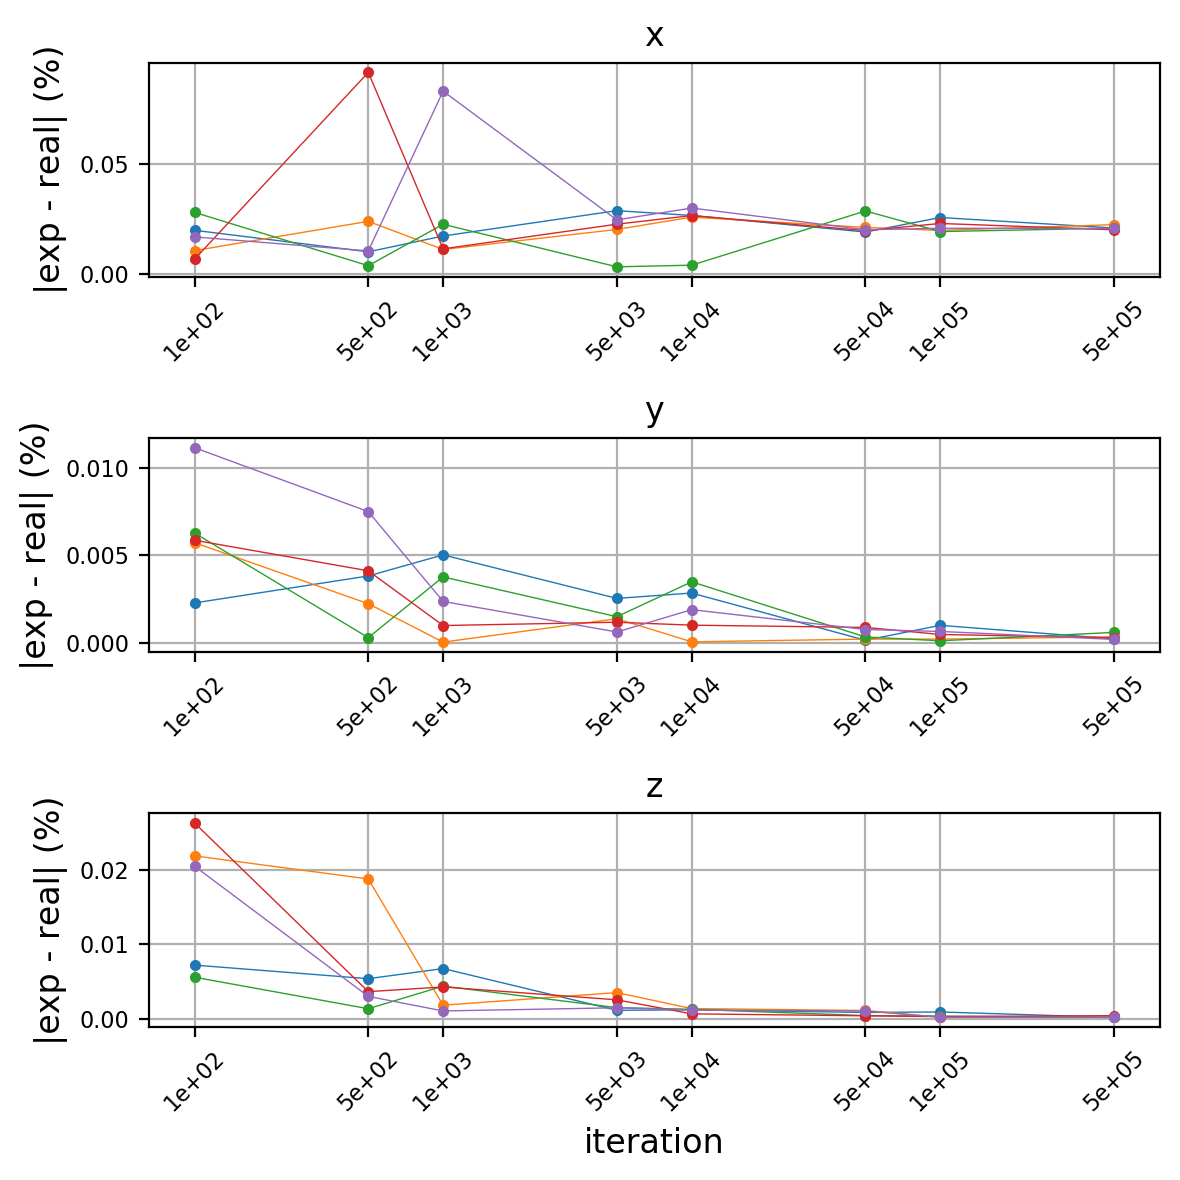

In [139]:
plt.figure(dpi=200, figsize=(6, 6))
labels = ['x', 'y', 'z']
for dim in range(3):
    plt.subplot(3,1,dim+1)
    for i in range(n_em):
        plt.plot(np.log(itrs), errs[dim][i], '.-', lw=0.5)
    plt.xticks(np.log(itrs), labels=['%.0e'%(i) for i in itrs], rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.ylabel('|exp - real| (%)', fontsize=12)
    plt.title(labels[dim], fontsize=12)
    # plt.ylim([0, 5])
    plt.grid(True)
plt.xlabel('iteration', fontsize=12)
plt.tight_layout()
plt.show()